In [ ]:
# default_exp mundo

# Curvas de coronavirus - Comparação Brasil e alguns países do mundo

## Link ##

https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide?fbclid=IwAR349UqPdhIujQOAwhnj9BrKBHMlhUjS0LRm0mN1nBeZjG-cYH3ROi6ific

In [ ]:
#hide
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as ticker
import numpy as np; np.random.seed(1)
import seaborn as sns
sns.set(style="ticks", rc={"lines.linewidth": 1.6})
sns.set_palette('bright')
import pandas as pd
from datetime import date
import io


In [ ]:
#hide
# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
#hide
# Abrir pasta com os arquivos
%cd "/content/drive/My Drive/CoronaVirus Brasil"

/content/drive/My Drive/CoronaVirus Brasil


In [ ]:
#hide
# Visualizar arquivos locais
ls

'Brasil auxiliar '/   Brasil.ipynb   Corona_mundo.ipynb   plots/


### Dia

In [ ]:
todei = date.today()
today = todei.strftime("%d-%m-%Y")
today_us = todei.strftime("%Y-%m-%d")
today_us

'2020-03-25'

In [ ]:
url = 'https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-{}.xlsx'.format(today_us)


In [ ]:
data = pd.read_excel(url)
data.tail()

,DateRep,Day,Month,Year,Cases,Deaths,Countries and territories,GeoId,Pop_Data.2018
6733,2020-03-25,25,3,2020,0,0,Zimbabwe,ZW,14439018.0
6734,2020-03-24,24,3,2020,0,1,Zimbabwe,ZW,14439018.0
6735,2020-03-23,23,3,2020,0,0,Zimbabwe,ZW,14439018.0
6736,2020-03-22,22,3,2020,1,0,Zimbabwe,ZW,14439018.0
6737,2020-03-21,21,3,2020,1,0,Zimbabwe,ZW,14439018.0


In [ ]:
data2 = data[data['Countries and territories'].isin(['Brazil','Italy','United_States_of_America','France','South_Korea', 'Japan','United_Kingdom','China','Spain','Argentina','India','Mexico','Germany','Czech_Republic'])]


In [ ]:
data3 = data2[['DateRep','Cases','Countries and territories']]

In [ ]:
pop_br = 2093000
pop_it = 6059000
pop_eua = 3257000
pop_uk = 6604000
pop_sk = 5147000
pop_fr = 6677000
pop_jp = 1268000
pop_esp = 4653000
pop_ar = 4427000
pop_mex = 1292000
pop_ind = 13390000
pop_ger = 8252000
pop_rc = 1064100

### Dados dos países individualmente###

In [ ]:
germany = data3[data3['Countries and territories']=='Germany']
germany.sort_index(ascending=False,inplace=True)
germany['Cumulativo'] = germany['Cases'].cumsum()
germany['Relativo'] = germany['Cumulativo']/pop_ger
germany = germany[germany['Cumulativo']>=50]
germany.reset_index(drop=True, inplace=True)
germany.drop(['Cases','DateRep'],axis=1,inplace=True)
germany.tail(5)

,Countries and territories,Cumulativo,Relativo
21,Germany,18187,0.002204
22,Germany,21463,0.002601
23,Germany,24774,0.003002
24,Germany,29212,0.003540
25,Germany,31554,0.003824


In [ ]:
italy = data3[data3['Countries and territories']=='Italy']
italy.sort_index(ascending=False,inplace=True)
italy['Cumulativo'] = italy['Cases'].cumsum()
italy['Relativo'] = italy['Cumulativo']/pop_it
italy = italy[italy['Cumulativo']>=50]
italy.reset_index(drop=True, inplace=True)
italy.drop(['Cases','DateRep'],axis=1,inplace=True)

italy.tail(5)

,Countries and territories,Cumulativo,Relativo
27,Italy,47021,0.007761
28,Italy,53578,0.008843
29,Italy,59138,0.009760
30,Italy,63927,0.010551
31,Italy,69176,0.011417


In [ ]:
brazil = data3[data3['Countries and territories']=='Brazil']
brazil.sort_index(ascending=False,inplace=True)
brazil['Cumulativo'] = brazil['Cases'].cumsum()
brazil['Relativo'] = brazil['Cumulativo']/pop_br
brazil = brazil[brazil['Cumulativo']>=50]
brazil.reset_index(drop=True, inplace=True)
brazil.drop(['Cases','DateRep'],axis=1,inplace=True)
brazil.tail(5)


brazil


,Countries and territories,Cumulativo,Relativo
0,Brazil,52,0.000025
1,Brazil,77,0.000037
2,Brazil,98,0.000047
3,Brazil,121,0.000058
4,Brazil,200,0.000096
5,Brazil,234,0.000112
6,Brazil,291,0.000139
7,Brazil,428,0.000204
8,Brazil,621,0.000297
9,Brazil,904,0.000432


In [ ]:
argentina = data3[data3['Countries and territories']=='Argentina']
argentina.sort_index(ascending=False,inplace=True)
argentina['Cumulativo'] = argentina['Cases'].cumsum()
argentina['Relativo'] = argentina['Cumulativo']/pop_ar
argentina = argentina[argentina['Cumulativo']>=50]
argentina.reset_index(drop=True, inplace=True)
argentina.drop(['Cases','DateRep'],axis=1,inplace=True)
argentina.head(5)

,Countries and territories,Cumulativo,Relativo
0,Argentina,56,0.000013
1,Argentina,65,0.000015
2,Argentina,79,0.000018
3,Argentina,97,0.000022
4,Argentina,128,0.000029


In [ ]:
japan = data3[data3['Countries and territories']=='Japan']
japan.sort_index(ascending=False,inplace=True)
japan['Cumulativo'] = japan['Cases'].cumsum()
japan['Relativo'] = japan['Cumulativo']/pop_jp
japan = japan[japan['Cumulativo']>=50]
japan.reset_index(drop=True, inplace=True)
japan.drop(['Cases','DateRep'],axis=1,inplace=True)
japan.tail(5)

,Countries and territories,Cumulativo,Relativo
34,Japan,1007,0.000794
35,Japan,1046,0.000825
36,Japan,1089,0.000859
37,Japan,1128,0.000890
38,Japan,1193,0.000941


In [ ]:
france = data3[data3['Countries and territories']=='France']
france.sort_index(ascending=False,inplace=True)
france['Cumulativo'] = france['Cases'].cumsum()
france['Relativo'] = france['Cumulativo']/pop_fr
france = france[france['Cumulativo']>=50]
france.reset_index(drop=True, inplace=True)
france.drop(['Cases','DateRep'],axis=1,inplace=True)
france.tail(5)

,Countries and territories,Cumulativo,Relativo
21,France,12612,0.001889
22,France,14459,0.002165
23,France,16018,0.002399
24,France,19856,0.002974
25,France,22302,0.003340


In [ ]:
south_korea = data3[data3['Countries and territories']=='South_Korea']
south_korea.sort_index(ascending=False,inplace=True)
south_korea['Cumulativo'] = south_korea['Cases'].cumsum()
south_korea['Relativo'] = south_korea['Cumulativo']/pop_sk
south_korea = south_korea[south_korea['Cumulativo']>=50]
south_korea.reset_index(drop=True, inplace=True)
south_korea.drop(['Cases','DateRep'],axis=1,inplace=True)
south_korea.tail(5)

,Countries and territories,Cumulativo,Relativo
30,South_Korea,8799,0.001710
31,South_Korea,8897,0.001729
32,South_Korea,8961,0.001741
33,South_Korea,9037,0.001756
34,South_Korea,9137,0.001775


In [ ]:
us = data3[data3['Countries and territories']=='United_States_of_America']
us.sort_index(ascending=False,inplace=True)
us['Cumulativo'] = us['Cases'].cumsum()
us['Relativo'] = us['Cumulativo']/pop_eua
us = us[us['Cumulativo']>=50]
us.reset_index(drop=True, inplace=True)
us.drop(['Cases','DateRep'],axis=1,inplace=True)
us.tail(5)

,Countries and territories,Cumulativo,Relativo
25,United_States_of_America,19624,0.006025
26,United_States_of_America,26747,0.008212
27,United_States_of_America,35206,0.010809
28,United_States_of_America,46442,0.014259
29,United_States_of_America,55231,0.016958


In [ ]:
uk = data3[data3['Countries and territories']=='United_Kingdom']
uk.sort_index(ascending=False,inplace=True)
uk['Cumulativo'] = uk['Cases'].cumsum()
uk['Relativo'] = uk['Cumulativo']/pop_uk
uk = uk[uk['Cumulativo']>=50]
uk.reset_index(drop=True, inplace=True)
uk.drop(['Cases','DateRep'],axis=1,inplace=True)
uk.tail(5)

,Countries and territories,Cumulativo,Relativo
17,United_Kingdom,3983,0.000603
18,United_Kingdom,5018,0.000760
19,United_Kingdom,5683,0.000861
20,United_Kingdom,6650,0.001007
21,United_Kingdom,8077,0.001223


In [ ]:
spain = data3[data3['Countries and territories']=='Spain']
spain.sort_index(ascending=False,inplace=True)
spain['Cumulativo'] = spain['Cases'].cumsum()
spain['Relativo'] = spain['Cumulativo']/pop_esp
spain = spain[spain['Cumulativo']>=50]
spain.reset_index(drop=True, inplace=True)
spain.drop(['Cases','DateRep'],axis=1,inplace=True)
spain.tail(5)

,Countries and territories,Cumulativo,Relativo
20,Spain,19980,0.004294
21,Spain,24926,0.005357
22,Spain,28572,0.006141
23,Spain,33089,0.007111
24,Spain,39673,0.008526


In [ ]:
mexico = data3[data3['Countries and territories']=='Mexico']
mexico.sort_index(ascending=False,inplace=True)
mexico['Cumulativo'] = mexico['Cases'].cumsum()
mexico['Relativo'] = mexico['Cumulativo']/pop_esp
mexico = mexico[mexico['Cumulativo']>=50]
mexico.reset_index(drop=True, inplace=True)
mexico.drop(['Cases','DateRep'],axis=1,inplace=True)
mexico.tail(5)

,Countries and territories,Cumulativo,Relativo
5,Mexico,203,0.000044
6,Mexico,251,0.000054
7,Mexico,316,0.000068
8,Mexico,367,0.000079
9,Mexico,405,0.000087


In [ ]:
india = data3[data3['Countries and territories']=='India']
india.sort_index(ascending=False,inplace=True)
india['Cumulativo'] = india['Cases'].cumsum()
india['Relativo'] = india['Cumulativo']/pop_ind
india = india[india['Cumulativo']>=50]
india.reset_index(drop=True, inplace=True)
india.drop(['Cases','DateRep'],axis=1,inplace=True)
india.tail(5)


,Countries and territories,Cumulativo,Relativo
10,India,231,0.000017
11,India,320,0.000024
12,India,439,0.000033
13,India,492,0.000037
14,India,562,0.000042


In [ ]:
czech_Republic = data3[data3['Countries and territories']=='Czech_Republic']
czech_Republic.sort_index(ascending=False,inplace=True)
czech_Republic['Cumulativo'] = czech_Republic['Cases'].cumsum()
czech_Republic['Relativo'] = czech_Republic['Cumulativo']/pop_rc
czech_Republic = czech_Republic[czech_Republic['Cumulativo']>=50]
czech_Republic.reset_index(drop=True, inplace=True)
czech_Republic.drop(['Cases','DateRep'],axis=1,inplace=True)
czech_Republic.tail(5)


,Countries and territories,Cumulativo,Relativo
10,Czech_Republic,904,0.000850
11,Czech_Republic,995,0.000935
12,Czech_Republic,1165,0.001095
13,Czech_Republic,1236,0.001162
14,Czech_Republic,1394,0.001310


In [ ]:
mexico = data3[data3['Countries and territories']=='Mexico']
mexico.sort_index(ascending=False,inplace=True)
mexico['Cumulativo'] = mexico['Cases'].cumsum()
mexico['Relativo'] = mexico['Cumulativo']/pop_ind
mexico = mexico[mexico['Cumulativo']>=50]
mexico.reset_index(drop=True, inplace=True)
mexico.drop(['Cases','DateRep'],axis=1,inplace=True)
mexico.tail(5)

,Countries and territories,Cumulativo,Relativo
5,Mexico,203,0.000015
6,Mexico,251,0.000019
7,Mexico,316,0.000024
8,Mexico,367,0.000027
9,Mexico,405,0.000030


### Tabela final ###

In [ ]:
final_data=pd.concat([brazil,italy,japan,uk,us,france,south_korea,spain,argentina,india,mexico,germany,czech_Republic],axis=0)
final_data['Dias']=final_data.index
final_data.columns = ['Países e territórios','Casos acumulados','Relativa','Dias desde o caso número 50']
final_data.tail(5)


,Países e territórios,Casos acumulados,Relativa,Dias desde o caso número 50
10,Czech_Republic,904,0.000850,10
11,Czech_Republic,995,0.000935,11
12,Czech_Republic,1165,0.001095,12
13,Czech_Republic,1236,0.001162,13
14,Czech_Republic,1394,0.001310,14


## Adicionando percentual 

In [ ]:
brazil_dupl = brazil
brazil_dupl['razao']= brazil_dupl['Cumulativo'].pct_change()
brazil_dupl['razao']=(brazil_dupl['razao']*100).round(2)
brazil_dupl['dias']= brazil_dupl.index
brazil_dupl.tail(5)


,Countries and territories,Cumulativo,Relativo,razao,dias
9,Brazil,904,0.000432,45.57,9
10,Brazil,1128,0.000539,24.78,10
11,Brazil,1546,0.000739,37.06,11
12,Brazil,1891,0.000903,22.32,12
13,Brazil,2201,0.001052,16.39,13


In [ ]:
zoom = final_data[final_data['Casos acumulados']<=2500]

## Gráficos de contaminação

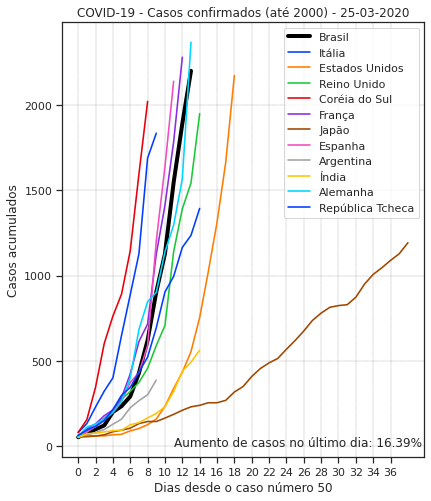

In [ ]:
plt.figure(figsize=(6.5,8))

sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=zoom[zoom['Países e territórios']=='Brazil'],color='black',linewidth=4,label='Brasil')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=zoom[zoom['Países e territórios']=='Italy'],label='Itália')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=zoom[zoom['Países e territórios']=='United_States_of_America'],label='Estados Unidos')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=zoom[zoom['Países e territórios']=='United_Kingdom'],label='Reino Unido')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=zoom[zoom['Países e territórios']=='South_Korea'],label= "Coréia do Sul")
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=zoom[zoom['Países e territórios']=='France'],label='França')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=zoom[zoom['Países e territórios']=='Japan'],label='Japão')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=zoom[zoom['Países e territórios']=='Spain'],label='Espanha')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=zoom[zoom['Países e territórios']=='Argentina'],label='Argentina')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=zoom[zoom['Países e territórios']=='India'],label='Índia')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=zoom[zoom['Países e territórios']=='Germany'],label='Alemanha')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=zoom[zoom['Países e territórios']=='Czech_Republic'],label='República Tcheca')


razao = brazil_dupl['razao'].values[-1]
texto = 'Aumento de casos no último dia: '+ str(razao)+'%'
plt.text(11, 0,texto,fontsize=12)
plt.grid(color='black', linestyle='--', linewidth=0.17)

plt.xticks([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28,30,32,34,36])
plt.title('COVID-19 - Casos confirmados (até 2000) - {}'.format(today))

plt.savefig("plots/01_corona_zoom.png")


In [ ]:
meio_zoom = final_data[final_data['Casos acumulados']<=5000]

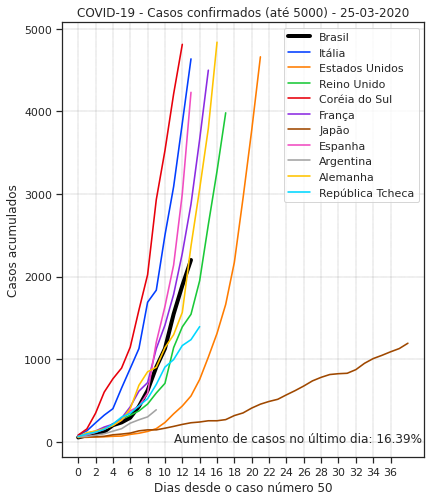

In [ ]:
plt.figure(figsize=(6.5,8))

sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=meio_zoom[meio_zoom['Países e territórios']=='Brazil'],color='black',linewidth=4,label='Brasil')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=meio_zoom[meio_zoom['Países e territórios']=='Italy'],label='Itália')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=meio_zoom[meio_zoom['Países e territórios']=='United_States_of_America'],label='Estados Unidos')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=meio_zoom[meio_zoom['Países e territórios']=='United_Kingdom'],label='Reino Unido')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=meio_zoom[meio_zoom['Países e territórios']=='South_Korea'],label= "Coréia do Sul")
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=meio_zoom[meio_zoom['Países e territórios']=='France'],label='França')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=meio_zoom[meio_zoom['Países e territórios']=='Japan'],label='Japão')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=meio_zoom[meio_zoom['Países e territórios']=='Spain'],label='Espanha')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=meio_zoom[meio_zoom['Países e territórios']=='Argentina'],label='Argentina')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=meio_zoom[meio_zoom['Países e territórios']=='Germany'],label='Alemanha')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=meio_zoom[meio_zoom['Países e territórios']=='Czech_Republic'],label='República Tcheca')

plt.grid(color='black', linestyle='--', linewidth=0.17)

plt.text(11,0,texto,fontsize=12)
plt.xticks([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28,30,32,34,36])
plt.title('COVID-19 - Casos confirmados (até 5000) - {}'.format(today))
plt.savefig("plots/02_corona_meio_zoom")

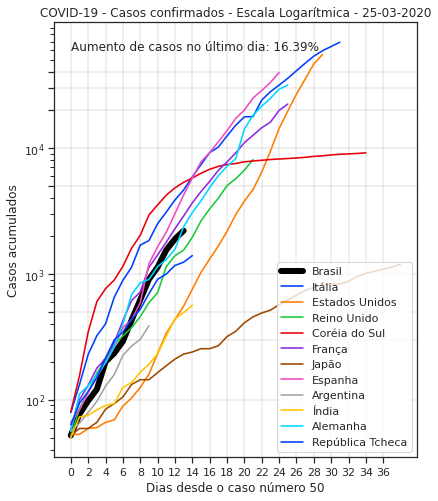

In [ ]:
plt.figure(figsize=(6.5,8))

sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=final_data[final_data['Países e territórios']=='Brazil'],color='black',linewidth=6,label='Brasil')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=final_data[final_data['Países e territórios']=='Italy'],label='Itália')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=final_data[final_data['Países e territórios']=='United_States_of_America'],label='Estados Unidos')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=final_data[final_data['Países e territórios']=='United_Kingdom'],label='Reino Unido')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=final_data[final_data['Países e territórios']=='South_Korea'],label= "Coréia do Sul")
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=final_data[final_data['Países e territórios']=='France'],label='França')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=final_data[final_data['Países e territórios']=='Japan'],label='Japão')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=final_data[final_data['Países e territórios']=='Spain'],label='Espanha')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=final_data[final_data['Países e territórios']=='Argentina'],label='Argentina')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=final_data[final_data['Países e territórios']=='India'],label='Índia')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=final_data[final_data['Países e territórios']=='Germany'],label='Alemanha')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=final_data[final_data['Países e territórios']=='Czech_Republic'],label='República Tcheca')


plt.grid(color='black', linestyle='--', linewidth=0.17)
plt.yscale('log')


plt.yticks([100,300,500,1000,5000,10000,20000,30000,40000] )
plt.xticks([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28,30,32,34,36])
plt.title('COVID-19 - Casos confirmados - Escala Logarítmica - {}'.format(today))
plt.text(0,60000,texto,fontsize=12)

plt.savefig("plots/03_corona_grafico.png")


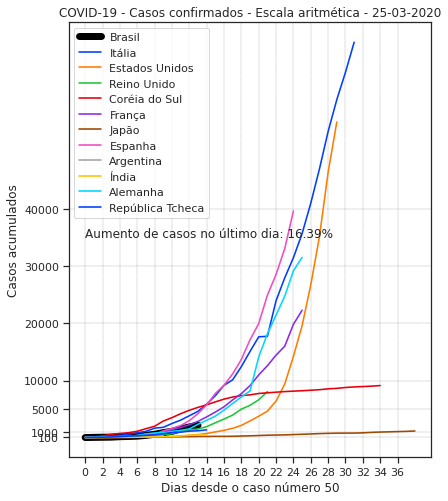

In [ ]:
plt.figure(figsize=(6.5,8))

sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=final_data[final_data['Países e territórios']=='Brazil'],color='black',linewidth=7,label='Brasil')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=final_data[final_data['Países e territórios']=='Italy'],label='Itália')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=final_data[final_data['Países e territórios']=='United_States_of_America'],label='Estados Unidos')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=final_data[final_data['Países e territórios']=='United_Kingdom'],label='Reino Unido')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=final_data[final_data['Países e territórios']=='South_Korea'],label= "Coréia do Sul")
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=final_data[final_data['Países e territórios']=='France'],label='França')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=final_data[final_data['Países e territórios']=='Japan'],label='Japão')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=final_data[final_data['Países e territórios']=='Spain'],label='Espanha')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=final_data[final_data['Países e territórios']=='Argentina'],label='Argentina')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=final_data[final_data['Países e territórios']=='India'],label='Índia')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=final_data[final_data['Países e territórios']=='Germany'],label='Alemanha')
sns.lineplot(x='Dias desde o caso número 50',y='Casos acumulados',data=final_data[final_data['Países e territórios']=='Czech_Republic'],label='República Tcheca')


plt.grid(color='black', linestyle='--', linewidth=0.17)


plt.text(0,35000,texto,fontsize=12)

plt.yticks([100,1000,5000,10000,20000,30000,40000] )
plt.xticks([  0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28,30,32,34,36])
plt.title('COVID-19 - Casos confirmados - Escala aritmética - {}'.format(today))

plt.savefig("plots/04_corona_grafico_art.png")



## MORTES ##

## Criando tabelas

In [ ]:
mortos = data2[['DateRep','Deaths','Countries and territories']]

In [ ]:
mgermany = mortos[mortos['Countries and territories']=='Germany']
mgermany.sort_index(ascending=False,inplace=True)
mgermany['Cumulativo'] = mgermany['Deaths'].cumsum()
mgermany = mgermany[mgermany['Cumulativo']>=1]
mgermany.reset_index(drop=True, inplace=True)
mgermany.drop(['Deaths','DateRep'],axis=1,inplace=True)
mgermany.tail(5)

,Countries and territories,Cumulativo
11,Germany,45
12,Germany,67
13,Germany,94
14,Germany,126
15,Germany,149


In [ ]:
mitaly = mortos[mortos['Countries and territories']=='Italy']
mitaly.sort_index(ascending=False,inplace=True)
mitaly['Cumulativo'] = mitaly['Deaths'].cumsum()
mitaly = mitaly[mitaly['Cumulativo']>=1]
mitaly.reset_index(drop=True, inplace=True)
mitaly.drop(['Deaths','DateRep'],axis=1,inplace=True)
mitaly.tail(5)

,Countries and territories,Cumulativo
27,Italy,4032
28,Italy,4827
29,Italy,5476
30,Italy,6077
31,Italy,6820


In [ ]:
margentina = mortos[mortos['Countries and territories']=='Argentina']
margentina.sort_index(ascending=False,inplace=True)
margentina['Cumulativo'] = margentina['Deaths'].cumsum()
margentina = margentina[margentina['Cumulativo']>=1]
margentina.reset_index(drop=True, inplace=True)
margentina.drop(['Deaths','DateRep'],axis=1,inplace=True)
margentina.tail(5)

,Countries and territories,Cumulativo
11,Argentina,3
12,Argentina,4
13,Argentina,4
14,Argentina,4
15,Argentina,6


In [ ]:
mbrazil = mortos[mortos['Countries and territories']=='Brazil']
mbrazil.sort_index(ascending=False,inplace=True)
mbrazil['Cumulativo'] = mbrazil['Deaths'].cumsum()
mbrazil = mbrazil[mbrazil['Cumulativo']>=1]
mbrazil.reset_index(drop=True, inplace=True)
mbrazil.drop(['Deaths','DateRep'],axis=1,inplace=True)
mbrazil.tail(5)

,Countries and territories,Cumulativo
3,Brazil,11
4,Brazil,18
5,Brazil,25
6,Brazil,34
7,Brazil,46


In [ ]:
mjapan = mortos[mortos['Countries and territories']=='Japan']
mjapan.sort_index(ascending=False,inplace=True)
mjapan['Cumulativo'] = mjapan['Deaths'].cumsum()
mjapan = mjapan[mjapan['Cumulativo']>=1]
mjapan.reset_index(drop=True, inplace=True)
mjapan.drop(['Deaths','DateRep'],axis=1,inplace=True)
mjapan.tail(5)

,Countries and territories,Cumulativo
37,Japan,35
38,Japan,36
39,Japan,41
40,Japan,42
41,Japan,43


In [ ]:
msouth_korea = mortos[mortos['Countries and territories']=='South_Korea']
msouth_korea.sort_index(ascending=False,inplace=True)
msouth_korea['Cumulativo'] = msouth_korea['Deaths'].cumsum()
msouth_korea = msouth_korea[msouth_korea['Cumulativo']>=1]
msouth_korea.reset_index(drop=True, inplace=True)
msouth_korea.drop(['Deaths','DateRep'],axis=1,inplace=True)
msouth_korea.tail(5)

,Countries and territories,Cumulativo
29,South_Korea,103
30,South_Korea,104
31,South_Korea,113
32,South_Korea,120
33,South_Korea,126


In [ ]:
mus = mortos[mortos['Countries and territories']=='United_States_of_America']
mus.sort_index(ascending=False,inplace=True)
mus['Cumulativo'] = mus['Deaths'].cumsum()
mus = mus[mus['Cumulativo']>=1]
mus.reset_index(drop=True, inplace=True)
mus.drop(['Deaths','DateRep'],axis=1,inplace=True)
mus.tail(5)

,Countries and territories,Cumulativo
20,United_States_of_America,260
21,United_States_of_America,340
22,United_States_of_America,471
23,United_States_of_America,590
24,United_States_of_America,801


In [ ]:
mfrance = mortos[mortos['Countries and territories']=='France']
mfrance.sort_index(ascending=False,inplace=True)
mfrance['Cumulativo'] = mfrance['Deaths'].cumsum()
mfrance = mfrance[mfrance['Cumulativo']>=1]
mfrance.reset_index(drop=True, inplace=True)
mfrance.drop(['Deaths','DateRep'],axis=1,inplace=True)
mfrance.tail(5)

,Countries and territories,Cumulativo
35,France,450
36,France,562
37,France,674
38,France,860
39,France,1100


In [ ]:
muk = mortos[mortos['Countries and territories']=='United_Kingdom']
muk.sort_index(ascending=False,inplace=True)
muk['Cumulativo'] = muk['Deaths'].cumsum()
muk = muk[muk['Cumulativo']>=1]
muk.reset_index(drop=True, inplace=True)
muk.drop(['Deaths','DateRep'],axis=1,inplace=True)
muk.tail(5)

,Countries and territories,Cumulativo
15,United_Kingdom,177
16,United_Kingdom,233
17,United_Kingdom,281
18,United_Kingdom,335
19,United_Kingdom,422


In [ ]:
mchina = mortos[mortos['Countries and territories']=='China']
mchina.sort_index(ascending=False,inplace=True)
mchina['Cumulativo'] = mchina['Deaths'].cumsum()
mchina = mchina[mchina['Cumulativo']>=1]
mchina.reset_index(drop=True, inplace=True)
mchina.drop(['Deaths','DateRep'],axis=1,inplace=True)
mchina.head(5)

,Countries and territories,Cumulativo
0,China,1
1,China,1
2,China,1
3,China,1
4,China,2


In [ ]:
mspain = mortos[mortos['Countries and territories']=='Spain']
mspain.sort_index(ascending=False,inplace=True)
mspain['Cumulativo'] = mspain['Deaths'].cumsum()
mspain = mspain[mspain['Cumulativo']>=1]
mspain.reset_index(drop=True, inplace=True)
mspain.drop(['Deaths','DateRep'],axis=1,inplace=True)
mspain.head(5)

,Countries and territories,Cumulativo
0,Spain,1
1,Spain,3
2,Spain,5
3,Spain,5
4,Spain,5


In [ ]:
mindia = mortos[mortos['Countries and territories']=='India']
mindia.sort_index(ascending=False,inplace=True)
mindia['Cumulativo'] = mindia['Deaths'].cumsum()
mindia = mindia[mindia['Cumulativo']>=1]
mindia.reset_index(drop=True, inplace=True)
mindia.drop(['Deaths','DateRep'],axis=1,inplace=True)
mindia.head(5)

,Countries and territories,Cumulativo
0,India,1
1,India,2
2,India,2
3,India,2
4,India,3


In [ ]:
mczech = mortos[mortos['Countries and territories']=='Czech_Republic']
mczech.sort_index(ascending=False,inplace=True)
mczech['Cumulativo'] = mczech['Deaths'].cumsum()
mczech = mczech[mczech['Cumulativo']>=1]
mczech.reset_index(drop=True, inplace=True)
mczech.drop(['Deaths','DateRep'],axis=1,inplace=True)
mczech.tail(5)

,Countries and territories,Cumulativo
0,Czech_Republic,1
1,Czech_Republic,1
2,Czech_Republic,3


## Tabela final de mortes

In [ ]:
mfinal_data=pd.concat([mbrazil,mitaly,mjapan,muk,mus,msouth_korea,mfrance,mchina,mspain,margentina,mindia,mgermany,mczech],axis=0)
mfinal_data['Dias']=mfinal_data.index
mfinal_data.columns = ['Países e territórios','Mortes', 'Dias desde a primeira morte']


In [ ]:
mzoom = mfinal_data[mfinal_data['Mortes']<=100]

In [ ]:
mmeio_zoom = mfinal_data[mfinal_data['Mortes']<=500]

## Gráficos de mortes

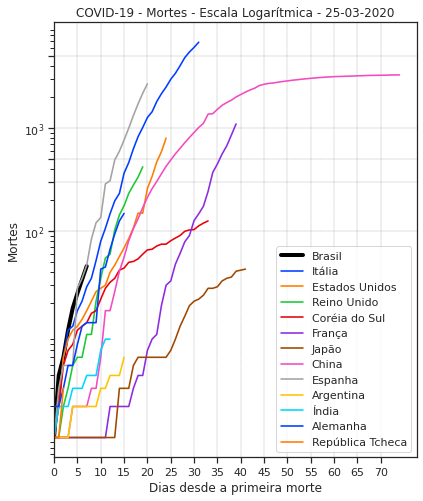

In [ ]:
plt.figure(figsize=(6.5,8))

sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mfinal_data[mfinal_data['Países e territórios']=='Brazil'],color='black',linewidth=4,label='Brasil')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mfinal_data[mfinal_data['Países e territórios']=='Italy'],label='Itália')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mfinal_data[mfinal_data['Países e territórios']=='United_States_of_America'],label='Estados Unidos')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mfinal_data[mfinal_data['Países e territórios']=='United_Kingdom'],label='Reino Unido')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mfinal_data[mfinal_data['Países e territórios']=='South_Korea'],label= "Coréia do Sul")
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mfinal_data[mfinal_data['Países e territórios']=='France'],label='França')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mfinal_data[mfinal_data['Países e territórios']=='Japan'],label='Japão')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mfinal_data[mfinal_data['Países e territórios']=='China'],label='China')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mfinal_data[mfinal_data['Países e territórios']=='Spain'],label='Espanha')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mfinal_data[mfinal_data['Países e territórios']=='Argentina'],label='Argentina')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mfinal_data[mfinal_data['Países e territórios']=='India'],label='Índia')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mfinal_data[mfinal_data['Países e territórios']=='Germany'],label='Alemanha')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mfinal_data[mfinal_data['Países e territórios']=='Czech_Republic'],label='República Tcheca')


plt.grid(color='black', linestyle='--', linewidth=0.17)
plt.xlim(70)

plt.yscale('log')
plt.yticks([100,300,500,1000,5000] )
plt.xticks([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70])
plt.title('COVID-19 - Mortes - Escala Logarítmica - {}'.format(today))

plt.savefig("plots/09_mortes_corona_grafico.png")

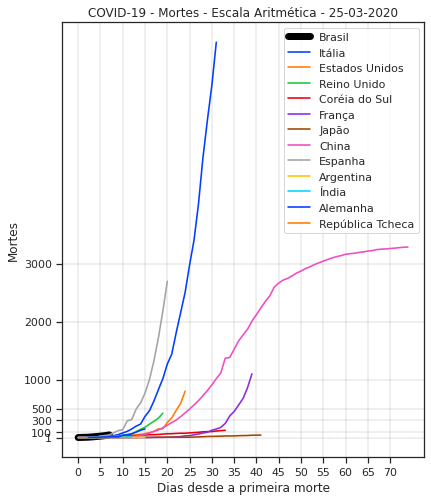

In [ ]:
plt.figure(figsize=(6.5,8))

sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mfinal_data[mfinal_data['Países e territórios']=='Brazil'],color='black',linewidth=7,label='Brasil')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mfinal_data[mfinal_data['Países e territórios']=='Italy'],label='Itália')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mfinal_data[mfinal_data['Países e territórios']=='United_States_of_America'],label='Estados Unidos')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mfinal_data[mfinal_data['Países e territórios']=='United_Kingdom'],label='Reino Unido')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mfinal_data[mfinal_data['Países e territórios']=='South_Korea'],label= "Coréia do Sul")
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mfinal_data[mfinal_data['Países e territórios']=='France'],label='França')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mfinal_data[mfinal_data['Países e territórios']=='Japan'],label='Japão')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mfinal_data[mfinal_data['Países e territórios']=='China'],label='China')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mfinal_data[mfinal_data['Países e territórios']=='Spain'],label='Espanha')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mfinal_data[mfinal_data['Países e territórios']=='Argentina'],label='Argentina')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mfinal_data[mfinal_data['Países e territórios']=='India'],label='Índia')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mfinal_data[mfinal_data['Países e territórios']=='Germany'],label='Alemanha')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mfinal_data[mfinal_data['Países e territórios']=='Czech_Republic'],label='República Tcheca')

plt.grid(color='black', linestyle='--', linewidth=0.17)


plt.yticks([1,100,300,500,1000,2000,3000] )
plt.xticks([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70])
plt.title('COVID-19 - Mortes - Escala Aritmética - {}'.format(today))

plt.savefig("plots/10_mortes_corona_grafico_art.png")

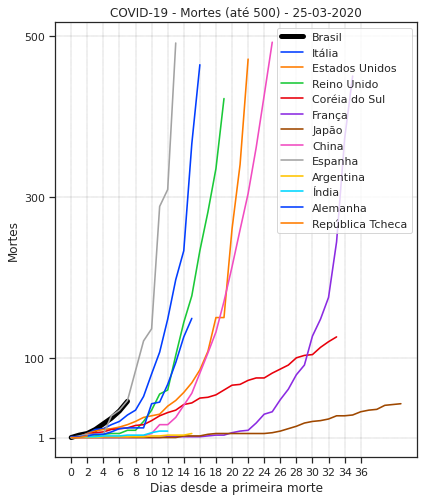

In [ ]:
plt.figure(figsize=(6.5,8))

sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mmeio_zoom[mmeio_zoom['Países e territórios']=='Brazil'],color='black',linewidth=5,label='Brasil')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mmeio_zoom[mmeio_zoom['Países e territórios']=='Italy'],label='Itália')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mmeio_zoom[mmeio_zoom['Países e territórios']=='United_States_of_America'],label='Estados Unidos')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mmeio_zoom[mmeio_zoom['Países e territórios']=='United_Kingdom'],label='Reino Unido')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mmeio_zoom[mmeio_zoom['Países e territórios']=='South_Korea'],label= "Coréia do Sul")
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mmeio_zoom[mmeio_zoom['Países e territórios']=='France'],label='França')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mmeio_zoom[mmeio_zoom['Países e territórios']=='Japan'],label='Japão')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mmeio_zoom[mmeio_zoom['Países e territórios']=='China'],label='China')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mmeio_zoom[mmeio_zoom['Países e territórios']=='Spain'],label='Espanha')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mmeio_zoom[mmeio_zoom['Países e territórios']=='Argentina'],label='Argentina')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mmeio_zoom[mmeio_zoom['Países e territórios']=='India'],label='Índia')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mmeio_zoom[mmeio_zoom['Países e territórios']=='Germany'],label='Alemanha')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mmeio_zoom[mmeio_zoom['Países e territórios']=='Czech_Republic'],label='República Tcheca')


plt.grid(color='black', linestyle='--', linewidth=0.17)


plt.yticks([1,100,300,500] )
plt.xticks([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28,30,32,34,36])
plt.title('COVID-19 - Mortes (até 500) - {}'.format(today))
plt.savefig("plots/08_mortes_corona_grafico_meiozoom.png")

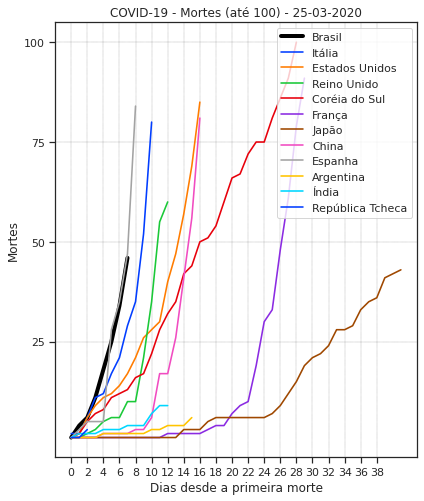

In [ ]:
plt.figure(figsize=(6.5,8))

sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mzoom[mzoom['Países e territórios']=='Brazil'],color='black',linewidth=4,label='Brasil')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mzoom[mzoom['Países e territórios']=='Italy'],label='Itália')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mzoom[mzoom['Países e territórios']=='United_States_of_America'],label='Estados Unidos')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mzoom[mzoom['Países e territórios']=='United_Kingdom'],label='Reino Unido')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mzoom[mzoom['Países e territórios']=='South_Korea'],label= "Coréia do Sul")
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mzoom[mzoom['Países e territórios']=='France'],label='França')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mzoom[mzoom['Países e territórios']=='Japan'],label='Japão')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mzoom[mzoom['Países e territórios']=='China'],label='China')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mzoom[mzoom['Países e territórios']=='Spain'],label='Espanha')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mzoom[mzoom['Países e territórios']=='Argentina'],label='Argentina')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mzoom[mzoom['Países e territórios']=='India'],label='Índia')
sns.lineplot(x='Dias desde a primeira morte',y='Mortes',data=mzoom[mzoom['Países e territórios']=='Czech_Republic'],label='República Tcheca')


plt.grid(color='black', linestyle='--', linewidth=0.17)


plt.yticks([25,50,75,100])
plt.xticks([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,34, 36, 38])
plt.title('COVID-19 - Mortes (até 100) - {}'.format(today))
plt.savefig("plots/05_mortes_corona_grafico_zoom.png")

## Curva percentual

In [ ]:
brazil['razao']= brazil['Cumulativo'].pct_change()
brazil['razao']=(brazil['razao']*100).round(2)
brazil['dias']= brazil.index
brazil

,Countries and territories,Cumulativo,Relativo,razao,dias
0,Brazil,52,0.000025,NaN,0
1,Brazil,77,0.000037,48.08,1
2,Brazil,98,0.000047,27.27,2
3,Brazil,121,0.000058,23.47,3
4,Brazil,200,0.000096,65.29,4
5,Brazil,234,0.000112,17.00,5
6,Brazil,291,0.000139,24.36,6
7,Brazil,428,0.000204,47.08,7
8,Brazil,621,0.000297,45.09,8
9,Brazil,904,0.000432,45.57,9


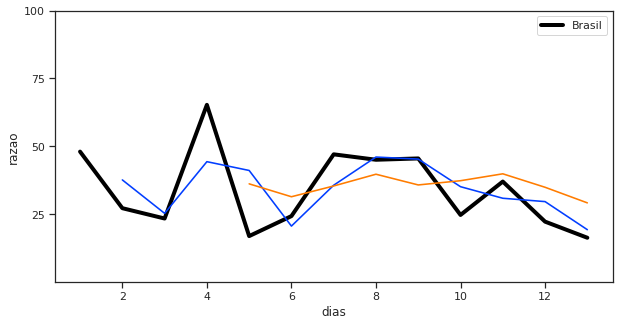

In [ ]:
plt.figure(figsize=(10,5))
plt.yticks([25,50,75,100])
plt.ylim(0,100)
sns.lineplot(x='dias',y='razao',data=brazil,color='black',linewidth=4,label='Brasil')
plt.plot(brazil['razao'].rolling(2).mean(),label= 'MA 2 days')
plt.plot(brazil['razao'].rolling(5).mean(),label= 'MA 5 days')

plt.savefig("plots/pct_change.png")


## Letalidade

In [ ]:
let_brazil =((mbrazil['Cumulativo'].values[-1]/brazil['Cumulativo'].values[-1])*100).round(2)
let_us = ((mus['Cumulativo'].values[-1]/us['Cumulativo'].values[-1])*100).round(2)
let_uk = ((muk['Cumulativo'].values[-1]/uk['Cumulativo'].values[-1])*100).round(2)
let_italy = ((mitaly['Cumulativo'].values[-1]/italy['Cumulativo'].values[-1])*100).round(2)
let_spain = ((mspain['Cumulativo'].values[-1]/spain['Cumulativo'].values[-1])*100).round(2)
let_japan = ((mjapan['Cumulativo'].values[-1]/japan['Cumulativo'].values[-1])*100).round(2)
let_arg = ((margentina['Cumulativo'].values[-1]/argentina['Cumulativo'].values[-1])*100).round(2)
let_fran = ((mfrance['Cumulativo'].values[-1]/france['Cumulativo'].values[-1])*100).round(2)
let_ind = ((mindia['Cumulativo'].values[-1]/india['Cumulativo'].values[-1])*100).round(2)
let_ger = ((mgermany['Cumulativo'].values[-1]/germany['Cumulativo'].values[-1])*100).round(2)
let_rc = ((mczech['Cumulativo'].values[-1]/czech_Republic['Cumulativo'].values[-1])*100).round(2)


let= [let_brazil,let_us,let_uk,let_italy,let_spain,let_fran,let_japan,let_arg,let_ind,let_ger,let_rc]
paises = ['Brasil','EUA', 'Reino Unido','Itália','Espanha','France','Japão','Argentina','Índia','Alemanha','República Tcheca']



In [ ]:
letality = pd.DataFrame()
letality['Países'] = paises
letality['Letalidade %'] = let
letality


,Países,Letalidade %
0,Brasil,2.09
1,EUA,1.45
2,Reino Unido,5.22
3,Itália,9.86
4,Espanha,6.80
5,France,4.93
6,Japão,3.60
7,Argentina,1.55
8,Índia,1.60
9,Alemanha,0.47


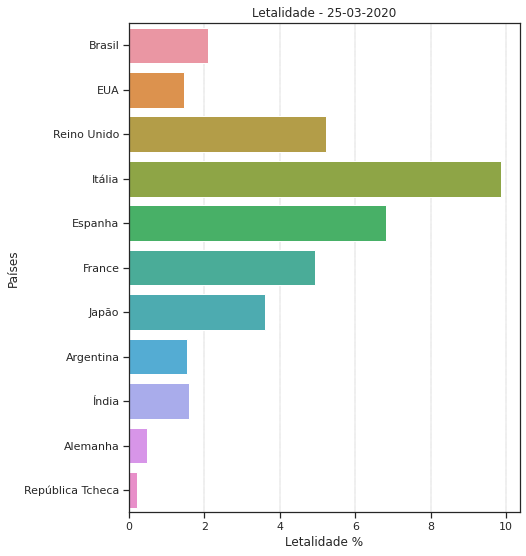

In [ ]:
plt.figure(figsize=(7,9))
plt.ylim(0,10)
plt.title("Letalidade - {}".format(today))
sns.barplot(letality['Letalidade %'],letality['Países'])
plt.grid(axis="x",color='black', linestyle='--', linewidth=0.17)
plt.savefig("plots/11_letalidade.png")


## Casos (abordagem relativa)

([<matplotlib.axis.XTick at 0x7fee91ddae10>,
 <a list of 19 Text major ticklabel objects>)

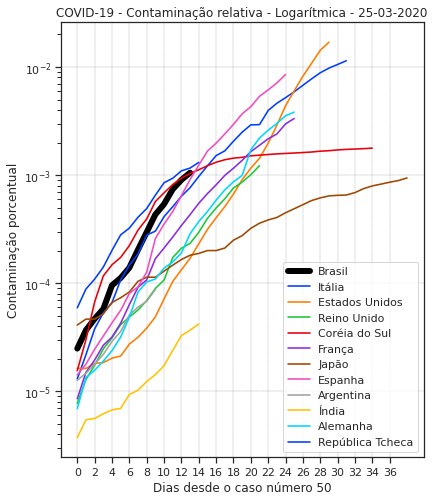

In [ ]:
plt.figure(figsize=(6.5,8))

sns.lineplot(x='Dias desde o caso número 50',y='Relativa',data=final_data[final_data['Países e territórios']=='Brazil'],color='black',linewidth=6,label='Brasil')
sns.lineplot(x='Dias desde o caso número 50',y='Relativa',data=final_data[final_data['Países e territórios']=='Italy'],label='Itália')
sns.lineplot(x='Dias desde o caso número 50',y='Relativa',data=final_data[final_data['Países e territórios']=='United_States_of_America'],label='Estados Unidos')
sns.lineplot(x='Dias desde o caso número 50',y='Relativa',data=final_data[final_data['Países e territórios']=='United_Kingdom'],label='Reino Unido')
sns.lineplot(x='Dias desde o caso número 50',y='Relativa',data=final_data[final_data['Países e territórios']=='South_Korea'],label= "Coréia do Sul")
sns.lineplot(x='Dias desde o caso número 50',y='Relativa',data=final_data[final_data['Países e territórios']=='France'],label='França')
sns.lineplot(x='Dias desde o caso número 50',y='Relativa',data=final_data[final_data['Países e territórios']=='Japan'],label='Japão')
sns.lineplot(x='Dias desde o caso número 50',y='Relativa',data=final_data[final_data['Países e territórios']=='Spain'],label='Espanha')
sns.lineplot(x='Dias desde o caso número 50',y='Relativa',data=final_data[final_data['Países e territórios']=='Argentina'],label='Argentina')
sns.lineplot(x='Dias desde o caso número 50',y='Relativa',data=final_data[final_data['Países e territórios']=='India'],label='Índia')
sns.lineplot(x='Dias desde o caso número 50',y='Relativa',data=final_data[final_data['Países e territórios']=='Germany'],label='Alemanha')
sns.lineplot(x='Dias desde o caso número 50',y='Relativa',data=final_data[final_data['Países e territórios']=='Czech_Republic'],label='República Tcheca')

plt.grid(color='black', linestyle='--', linewidth=0.17)
plt.ylabel('Contaminação porcentual')
plt.title('COVID-19 - Contaminação relativa - Logarítmica - {}'.format(today))
plt.yscale('log')
plt.savefig("plots/05_relativa_exponencial.png")

#plt.ylim(0,np.power(1,-16))
plt.xticks([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28,30,32,34,36])



([<matplotlib.axis.XTick at 0x7fee94fbd160>,
 <a list of 19 Text major ticklabel objects>)

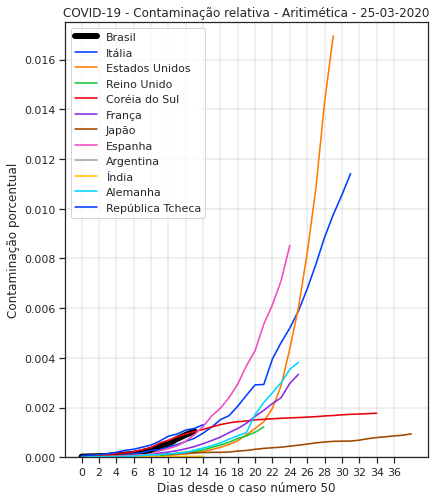

In [ ]:
plt.figure(figsize=(6.5,8))

sns.lineplot(x='Dias desde o caso número 50',y='Relativa',data=final_data[final_data['Países e territórios']=='Brazil'],color='black',linewidth=6,label='Brasil')
sns.lineplot(x='Dias desde o caso número 50',y='Relativa',data=final_data[final_data['Países e territórios']=='Italy'],label='Itália')
sns.lineplot(x='Dias desde o caso número 50',y='Relativa',data=final_data[final_data['Países e territórios']=='United_States_of_America'],label='Estados Unidos')
sns.lineplot(x='Dias desde o caso número 50',y='Relativa',data=final_data[final_data['Países e territórios']=='United_Kingdom'],label='Reino Unido')
sns.lineplot(x='Dias desde o caso número 50',y='Relativa',data=final_data[final_data['Países e territórios']=='South_Korea'],label= "Coréia do Sul")
sns.lineplot(x='Dias desde o caso número 50',y='Relativa',data=final_data[final_data['Países e territórios']=='France'],label='França')
sns.lineplot(x='Dias desde o caso número 50',y='Relativa',data=final_data[final_data['Países e territórios']=='Japan'],label='Japão')
sns.lineplot(x='Dias desde o caso número 50',y='Relativa',data=final_data[final_data['Países e territórios']=='Spain'],label='Espanha')
sns.lineplot(x='Dias desde o caso número 50',y='Relativa',data=final_data[final_data['Países e territórios']=='Argentina'],label='Argentina')
sns.lineplot(x='Dias desde o caso número 50',y='Relativa',data=final_data[final_data['Países e territórios']=='India'],label='Índia')
sns.lineplot(x='Dias desde o caso número 50',y='Relativa',data=final_data[final_data['Países e territórios']=='Germany'],label='Alemanha')
sns.lineplot(x='Dias desde o caso número 50',y='Relativa',data=final_data[final_data['Países e territórios']=='Czech_Republic'],label='República Tcheca')


plt.grid(color='black', linestyle='--', linewidth=0.17)
plt.ylabel('Contaminação porcentual')
plt.title('COVID-19 - Contaminação relativa - Aritimética - {}'.format(today))
plt.savefig("plots/06_relativa_aritmetica.png")

plt.ylim(0,0.0175)
plt.xticks([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28,30,32,34,36])


In [ ]:
import plotly.express as px

fig = px.line(final_data, x="Dias desde o caso número 50", y="Casos acumulados", color='Países e territórios',labels='Países e territórios')
fig.show()
fig.write_html("plots/11_letalidade.html")